In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("models/190715_113556.log") as f:
    loghead = ''.join([next(f) for x in range(11)])
print(loghead)

Curtis Hebe strated training.
Model is ConvSeq.
Resolution is 32.
Loss is iou.
Score is iou.
NumEpochs is 100.
Batch Length is 8.
Optimizer is SGD.
Learning rate is 0.01.
Momentum is 0.9.
Valid/Train ratio is 0.25.



![](models/190715_113556_plot.png)

In [3]:
from themodel import ConvSeq
model = ConvSeq()
model.load_state_dict(torch.load('models/190715_113556_model.pt', map_location='cpu'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [4]:
from thedataset import brats3dDataset
dataset = brats3dDataset('ignore/data/numpyData32')

In [6]:
import random
ITEM = random.randint(1,200)
x,y = dataset.__getitem__(ITEM)
x = x.unsqueeze(0)
y = y.unsqueeze(0)
model.eval()
y_pred = model(x)
y_pred = torch.sigmoid(y_pred).round()

IndexError: list index out of range

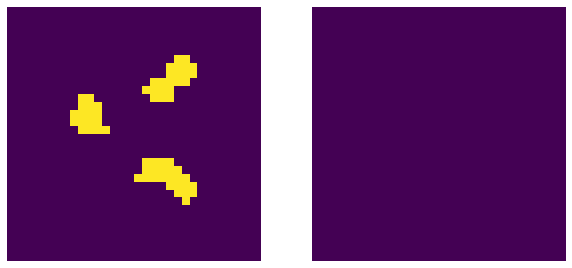

In [18]:
SLICE = random.randint(1,64)
npy = y.numpy()[0,:,:,SLICE]
npy_pred = y_pred.cpu().detach().numpy()[0,:,:,SLICE]

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.axis('off')
plt.imshow(npy_pred)

plt.subplot(122)
plt.axis('off')
plt.imshow(npy)

plt.show()